In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import UpSampling2D, Lambda

from tensorflow.keras import layers
from tensorflow.keras.layers import Resizing, Lambda


import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
from tf_explain.core.grad_cam import GradCAM


from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [21]:


inputs =tf.keras.layers.Input(shape=(128, 128, 3), name="input_tensor")
# down sampling
# first encoder convolution block
# 3x3
c1_conv3x3 = layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding="same")(inputs)
c1_conv3x3 = layers.Dropout(0.5)(c1_conv3x3)
c1_conv3x3 = layers.BatchNormalization()(c1_conv3x3)
c1_conv3x3 = layers.Activation("relu")(c1_conv3x3)

# 5x5
c1_conv5x5 = layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding="same")(c1_conv3x3)
c1_conv5x5 = layers.Dropout(0.5)(c1_conv5x5)
c1_conv5x5 = layers.BatchNormalization()(c1_conv5x5)
c1_conv5x5 = layers.Activation("relu")(c1_conv5x5)

# 7x7 
c1_conv7x7 = layers.Conv2D(filters=16, kernel_size=(7,7), strides=(1,1), padding="same")(c1_conv5x5)
c1_conv7x7 = layers.Dropout(0.5)(c1_conv7x7)
c1_conv7x7 = layers.BatchNormalization()(c1_conv7x7)
c1_conv7x7 = layers.Activation("relu")(c1_conv7x7)

skip_connection1 = c1_conv7x7


max_pool1 = layers.MaxPooling2D((1, 1))(c1_conv7x7)



# second encoder convolution block
# 3x3
c2_conv3x3 = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding="same")(max_pool1)
c2_conv3x3 = layers.Dropout(0.5)(c2_conv3x3)
c2_conv3x3 = layers.BatchNormalization()(c2_conv3x3)
c2_conv3x3 = layers.Activation("relu")(c2_conv3x3)

# 5x5
c2_conv5x5 = layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding="same")(c2_conv3x3)
c2_conv5x5 = layers.Dropout(0.5)(c2_conv5x5)
c2_conv5x5 = layers.BatchNormalization()(c2_conv5x5)
c2_conv5x5 = layers.Activation("relu")(c2_conv5x5)

# 7x7 
c2_conv7x7 = layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), padding="same")(c2_conv5x5)
c2_conv7x7 = layers.Dropout(0.5)(c2_conv7x7)
c2_conv7x7 = layers.BatchNormalization()(c2_conv7x7)
c2_conv7x7 = layers.Activation("relu")(c2_conv7x7)

skip_connection2 = c2_conv7x7

max_pool2 = layers.MaxPooling2D((1, 1))(c2_conv7x7)



# third encoder convolution block

# 3x3
c3_conv3x3 = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding="same")(max_pool2)
c3_conv3x3 = layers.Dropout(0.5)(c3_conv3x3)
c3_conv3x3 = layers.BatchNormalization()(c3_conv3x3)
c3_conv3x3 = layers.Activation("relu")(c3_conv3x3)

# 5x5
c3_conv5x5 = layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same")(c3_conv3x3)
c3_conv5x5 = layers.Dropout(0.5)(c3_conv5x5)
c3_conv5x5 = layers.BatchNormalization()(c3_conv5x5)
c3_conv5x5 = layers.Activation("relu")(c3_conv5x5)

# 7x7 
c3_conv7x7 = layers.Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding="same")(c3_conv5x5)
c3_conv7x7 = layers.Dropout(0.5)(c3_conv7x7)
c3_conv7x7 = layers.BatchNormalization()(c3_conv7x7)
c3_conv7x7 = layers.Activation("relu")(c3_conv7x7)

skip_connection3 = c3_conv7x7

max_pool3 = layers.MaxPooling2D((1, 1))(c3_conv7x7)




# fourth encoder convolution block

# 3x3
c4_conv3x3 = layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding="same")(max_pool3)
c4_conv3x3 = layers.Dropout(0.5)(c4_conv3x3)
c4_conv3x3 = layers.BatchNormalization()(c4_conv3x3)
c4_conv3x3 = layers.Activation("relu")(c4_conv3x3)

# 5x5
c4_conv5x5 = layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding="same")(c4_conv3x3)
c4_conv5x5 = layers.Dropout(0.5)(c4_conv5x5)
c4_conv5x5 = layers.BatchNormalization()(c4_conv5x5)
c4_conv5x5 = layers.Activation("relu")(c4_conv5x5)

# 7x7 
c4_conv7x7 = layers.Conv2D(filters=128, kernel_size=(7,7), strides=(1,1), padding="same")(c4_conv5x5)
c4_conv7x7 = layers.Dropout(0.5)(c4_conv7x7)
c4_conv7x7 = layers.BatchNormalization()(c4_conv7x7)
c4_conv7x7 = layers.Activation("relu")(c4_conv7x7)

skip_connection4 = c4_conv7x7

max_pool4 = layers.MaxPooling2D((1, 1))(c4_conv7x7)



# bridge block 
# 3x3
cb_conv3x3 = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same")(max_pool4)
cb_conv3x3 = layers.Dropout(0.5)(cb_conv3x3)
cb_conv3x3 = layers.BatchNormalization()(cb_conv3x3)
cb_conv3x3 = layers.Activation("relu")(cb_conv3x3)

# 5x5
cb_conv5x5 = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same")(cb_conv3x3)
cb_conv5x5 = layers.Dropout(0.5)(cb_conv5x5)
cb_conv5x5 = layers.BatchNormalization()(cb_conv5x5)
cb_conv5x5 = layers.Activation("relu")(cb_conv5x5)

# 7x7 
cb_conv7x7 = layers.Conv2D(filters=256, kernel_size=(7,7), strides=(1,1), padding="same")(cb_conv5x5)
cb_conv7x7 = layers.Dropout(0.5)(cb_conv7x7)
cb_conv7x7 = layers.BatchNormalization()(cb_conv7x7)
cb_conv7x7 = layers.Activation("relu")(cb_conv7x7)




# up sampling


# first decoder block 
filters1 = 128
# transpose convolution 
d1 = layers.Conv2DTranspose(filters1, (3, 3), strides=(2, 2), padding='same')(cb_conv7x7)
# resampled
d1_resampled_skip_connection = UpSampling2D(size=(2, 2), interpolation="bilinear")(skip_connection4)
# Channel resampling (1×1 convolution)
d1_resampled_skip_connection = layers.Conv2D(filters=1, kernel_size=(1, 1), padding="same")(d1_resampled_skip_connection)
# 1. Attention Mechanism
d1_atten1 = layers.Conv2D(1, (1, 1), padding="same")(d1_resampled_skip_connection)
d1_atten2 = layers.Conv2D(1, (1, 1), padding="same")(d1)
# Resize d1_atten2 to match the spatial dimensions of d1_atten1
# Resize d1_atten2 to match d1_atten1 using Keras Resizing laye
# adding 
d1_sum = layers.Add()([d1_atten1, d1_atten2])
# ReLU activation
d1_relu = layers.Activation('relu')(d1_sum)
# Second 1x1 convolution
d1_conv2 = layers.Conv2D(1, (1, 1), padding="same")(d1_relu)
# Sigmoid activation
d1_sigmoid = layers.Activation('sigmoid')(d1_conv2)
# element-wise multiplication
d1_attention_resampled = layers.Multiply()([d1_sigmoid, d1_resampled_skip_connection])
# 3x3 convolution after the attention mechanism
d1_attention_output = layers.Conv2D(filters1, (3, 3), padding="same")(d1_attention_resampled)
# Concatenation
d1_concatenated1 = layers.Concatenate()([d1_attention_output, d1])
d1_conv_7x7 = layers.Conv2D(
    filters=filters1, kernel_size=(7, 7), strides=(1, 1), padding="same"
)(d1_concatenated1)
d1_conv_7x7 = layers.Dropout(0.5)(d1_conv_7x7)
d1_conv_7x7 = layers.BatchNormalization()(d1_conv_7x7)
d1_conv_7x7 = layers.Activation("relu")(d1_conv_7x7)

d1_conv_5x5 = layers.Conv2D(
    filters=filters1, kernel_size=(5, 5), strides=(1, 1), padding="same"
)(d1_conv_7x7)
d1_conv_5x5 = layers.Dropout(0.5)(d1_conv_5x5)
d1_conv_5x5 = layers.BatchNormalization()(d1_conv_5x5)
d1_conv_5x5 = layers.Activation("relu")(d1_conv_5x5)

d1_conv_3x3 = layers.Conv2D(
    filters=filters1, kernel_size=(3, 3), strides=(1, 1), padding="same"
)(d1_conv_5x5)
d1_conv_3x3 = layers.Dropout(0.5)(d1_conv_3x3)
d1_conv_3x3 = layers.BatchNormalization()(d1_conv_3x3)
d1_conv_3x3 = layers.Activation("relu")(d1_conv_3x3)
# Concatenating multiscale features
d1_multiscale_output = layers.Concatenate()([d1_conv_3x3, d1_resampled_skip_connection])  
# Final 3x3 convolution
d1_final_output = layers.Conv2D(filters1, (3, 3), padding="same")(d1_multiscale_output)




# second decoder block 
filters2 = 64
# transpose convolution 
d2 = layers.Conv2DTranspose(filters2, (3, 3), strides=(2, 2), padding='same')(d1_final_output)
# resampled
d2_resampled_skip_connection = UpSampling2D(size=(2, 2), interpolation="bilinear")(skip_connection3)
# Channel resampling (1×1 convolution)
d2_resampled_skip_connection = layers.Conv2D(filters=1, kernel_size=(1, 1), padding="same")(d2_resampled_skip_connection)
# 1. Attention Mechanism
d2_atten1 = layers.Conv2D(1, (1, 1), padding="same")(d2_resampled_skip_connection)
d2_atten2 = layers.Conv2D(1, (1, 1), padding="same")(d2)
# Resize d1_atten2 to match the spatial dimensions of d1_atten1
# Resize d1_atten2 to match d1_atten1 using Keras Resizing laye
# adding 
d2_sum = layers.Add()([d2_atten1, d2_atten2])
# ReLU activation
d2_relu = layers.Activation('relu')(d2_sum)
# Second 1x1 convolution
d2_conv2 = layers.Conv2D(1, (1, 1), padding="same")(d2_relu)
# Sigmoid activation
d2_sigmoid = layers.Activation('sigmoid')(d2_conv2)
# element-wise multiplication
d2_attention_resampled = layers.Multiply()([d2_sigmoid, d2_resampled_skip_connection])
# 3x3 convolution after the attention mechanism
d2_attention_output = layers.Conv2D(filters2, (3, 3), padding="same")(d2_attention_resampled)
# Concatenation
d2_concatenated1 = layers.Concatenate()([d2_attention_output, d2])
d2_conv_7x7 = layers.Conv2D(
    filters=filters2, kernel_size=(7, 7), strides=(1, 1), padding="same"
)(d2_concatenated1)
d2_conv_7x7 = layers.Dropout(0.5)(d2_conv_7x7)
d2_conv_7x7 = layers.BatchNormalization()(d2_conv_7x7)
d2_conv_7x7 = layers.Activation("relu")(d2_conv_7x7)

d2_conv_5x5 = layers.Conv2D(
    filters=filters2, kernel_size=(5, 5), strides=(1, 1), padding="same"
)(d2_conv_7x7)
d2_conv_5x5 = layers.Dropout(0.5)(d2_conv_5x5)
d2_conv_5x5 = layers.BatchNormalization()(d2_conv_5x5)
d2_conv_5x5 = layers.Activation("relu")(d2_conv_5x5)

d2_conv_3x3 = layers.Conv2D(
    filters=filters2, kernel_size=(3, 3), strides=(1, 1), padding="same"
)(d2_conv_5x5)
d2_conv_3x3 = layers.Dropout(0.5)(d2_conv_3x3)
d2_conv_3x3 = layers.BatchNormalization()(d2_conv_3x3)
d2_conv_3x3 = layers.Activation("relu")(d2_conv_3x3)
# Concatenating multiscale features
d2_multiscale_output = layers.Concatenate()([d2_conv_3x3, d2_resampled_skip_connection])  
# Final 3x3 convolution
d2_final_output = layers.Conv2D(filters2, (3, 3), padding="same")(d2_multiscale_output)



# third decoder block 
filters3 = 32
# transpose convolution 
d3 = layers.Conv2DTranspose(filters3, (3, 3), strides=(2, 2), padding='same')(d2_final_output)
# resampled
d3_resampled_skip_connection = UpSampling2D(size=(2, 2), interpolation="bilinear")(skip_connection2)
# Channel resampling (1×1 convolution)
d3_resampled_skip_connection = layers.Conv2D(filters=1, kernel_size=(1, 1), padding="same")(d3_resampled_skip_connection)
# 1. Attention Mechanism
d3_atten1 = layers.Conv2D(1, (1, 1), padding="same")(d3_resampled_skip_connection)
d3_atten2 = layers.Conv2D(1, (1, 1), padding="same")(d3)
# adding 
d3_sum = layers.Add()([d3_atten1, d3_atten2])
# ReLU activation
d3_relu = layers.Activation('relu')(d3_sum)
# Second 1x1 convolution
d3_conv2 = layers.Conv2D(1, (1, 1), padding="same")(d3_relu)
# Sigmoid activation
d3_sigmoid = layers.Activation('sigmoid')(d3_conv2)
# element-wise multiplication
d3_attention_resampled = layers.Multiply()([d3_sigmoid, d3_resampled_skip_connection])
# 3x3 convolution after the attention mechanism
d3_attention_output = layers.Conv2D(filters3, (3, 3), padding="same")(d3_attention_resampled)
# Concatenation
d3_concatenated1 = layers.Concatenate()([d3_attention_output, d3])
d3_conv_7x7 = layers.Conv2D(
    filters=filters3, kernel_size=(7, 7), strides=(1, 1), padding="same"
)(d3_concatenated1)
d3_conv_7x7 = layers.Dropout(0.5)(d3_conv_7x7)
d3_conv_7x7 = layers.BatchNormalization()(d3_conv_7x7)
d3_conv_7x7 = layers.Activation("relu")(d3_conv_7x7)

d3_conv_5x5 = layers.Conv2D(
    filters=filters3, kernel_size=(5, 5), strides=(1, 1), padding="same"
)(d3_conv_7x7)
d3_conv_5x5 = layers.Dropout(0.5)(d3_conv_5x5)
d3_conv_5x5 = layers.BatchNormalization()(d3_conv_5x5)
d3_conv_5x5 = layers.Activation("relu")(d3_conv_5x5)

d3_conv_3x3 = layers.Conv2D(
    filters=filters3, kernel_size=(3, 3), strides=(1, 1), padding="same"
)(d3_conv_5x5)
d3_conv_3x3 = layers.Dropout(0.5)(d3_conv_3x3)
d3_conv_3x3 = layers.BatchNormalization()(d3_conv_3x3)
d3_conv_3x3 = layers.Activation("relu")(d3_conv_3x3)
# Concatenating multiscale features
d3_multiscale_output = layers.Concatenate()([d3_conv_3x3, d3_resampled_skip_connection])  
# Final 3x3 convolution
d3_final_output = layers.Conv2D(filters3, (3, 3), padding="same")(d3_multiscale_output)





# third decoder block 
filters4 = 32
# transpose convolution 
d4 = layers.Conv2DTranspose(filters4, (3, 3), strides=(2, 2), padding='same')(d3_final_output)
# resampled
d4_resampled_skip_connection = UpSampling2D(size=(2, 2), interpolation="bilinear")(skip_connection1)
# Channel resampling (1×1 convolution)
d4_resampled_skip_connection = layers.Conv2D(filters=1, kernel_size=(1, 1), padding="same")(d4_resampled_skip_connection)
# 1. Attention Mechanism
d4_atten1 = layers.Conv2D(1, (1, 1), padding="same")(d4_resampled_skip_connection)
d4_atten2 = layers.Conv2D(1, (1, 1), padding="same")(d4)
# adding 
d4_sum = layers.Add()([d4_atten1, d4_atten2])
# ReLU activation
d4_relu = layers.Activation('relu')(d4_sum)
# Second 1x1 convolution
d4_conv2 = layers.Conv2D(1, (1, 1), padding="same")(d4_relu)
# Sigmoid activation
d4_sigmoid = layers.Activation('sigmoid')(d4_conv2)
# element-wise multiplication
d4_attention_resampled = layers.Multiply()([d4_sigmoid, d4_resampled_skip_connection])
# 3x3 convolution after the attention mechanism
d4_attention_output = layers.Conv2D(filters4, (3, 3), padding="same")(d4_attention_resampled)
# Concatenation
d4_concatenated1 = layers.Concatenate()([d4_attention_output, d4])
d4_conv_7x7 = layers.Conv2D(
    filters=filters4, kernel_size=(7, 7), strides=(1, 1), padding="same"
)(d4_concatenated1)
d4_conv_7x7 = layers.Dropout(0.5)(d4_conv_7x7)
d4_conv_7x7 = layers.BatchNormalization()(d4_conv_7x7)
d4_conv_7x7 = layers.Activation("relu")(d4_conv_7x7)

d4_conv_5x5 = layers.Conv2D(
    filters=filters4, kernel_size=(5, 5), strides=(1, 1), padding="same"
)(d4_conv_7x7)
d4_conv_5x5 = layers.Dropout(0.5)(d4_conv_5x5)
d4_conv_5x5 = layers.BatchNormalization()(d4_conv_5x5)
d4_conv_5x5 = layers.Activation("relu")(d4_conv_5x5)

d4_conv_3x3 = layers.Conv2D(
    filters=filters4, kernel_size=(3, 3), strides=(1, 1), padding="same"
)(d4_conv_5x5)
d4_conv_3x3 = layers.Dropout(0.5)(d4_conv_3x3)
d4_conv_3x3 = layers.BatchNormalization()(d4_conv_3x3)
d4_conv_3x3 = layers.Activation("relu")(d4_conv_3x3)
# Concatenating multiscale features
d4_multiscale_output = layers.Concatenate()([d4_conv_3x3, d4_resampled_skip_connection])  
# Final 3x3 convolution
d4_final_output = layers.Conv2D(filters3, (3, 3), padding="same")(d4_multiscale_output)

outputs = layers.Conv2D(1,(1,1), activation = 'sigmoid')(d4_final_output)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_tensor (InputLayer)     │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_208 (Conv2D)           │ (None, 64, 64, 16)        │             448 │ input_tensor[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_108 (Dropout)         │ (None, 64, 64, 16)        │               0 │ conv2d_208[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_108       │ (None, 64, 64, 16)        │              64 │ dropout_108[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_140 (Activation)   │ (None, 64, 64, 16)        │               0 │ batch_normalization_108[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_209 (Conv2D)           │ (None, 64, 64, 16)        │           6,416 │ activation_140[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_109 (Dropout)         │ (None, 64, 64, 16)        │               0 │ conv2d_209[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_109       │ (None, 64, 64, 16)        │              64 │ dropout_109[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_141 (Activation)   │ (None, 64, 64, 16)        │               0 │ batch_normalization_109[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_210 (Conv2D)           │ (None, 64, 64, 16)        │          12,560 │ activation_141[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_110 (Dropout)         │ (None, 64, 64, 16)        │               0 │ conv2d_210[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_110       │ (None, 64, 64, 16)        │              64 │ dropout_110[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_142 (Activation)   │ (None, 64, 64, 16)        │               0 │ batch_normalization_110[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_16              │ (None, 64, 64, 16)        │               0 │ activation_142[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_211 (Conv2D)           │ (None, 32, 32, 32)        │           4,640 │ max_pooling2d_16[0][0]     │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 10,441,961 (39.83 MB)

 Trainable params: 10,437,449 (39.82 MB)

 Non-trainable params: 4,512 (17.62 KB)

In [22]:
def load_dataset(dataset_dir, img_size=(128, 128)):
    images, masks = [], []
    categories = ["Benign", "Malignant", "Normal"]

    for category in categories:
        img_dir = os.path.join(dataset_dir, category, "Images")
        mask_dir = os.path.join(dataset_dir, category, "Masks")

        img_files = sorted(glob.glob(os.path.join(img_dir, "*.png")))
        mask_files = sorted(glob.glob(os.path.join(mask_dir, "*.png")))

        print(f"{category}: Found {len(img_files)} images and {len(mask_files)} masks.")

        # Ensure image-mask pairing is correct
        if len(img_files) != len(mask_files):
            print(f"Warning: Mismatch in images and masks count for {category}")

        for img_path, mask_path in zip(img_files, mask_files):
            try:
                # Load and resize images and masks
                img = load_img(img_path, target_size=img_size)
                mask = load_img(mask_path, target_size=img_size, color_mode="grayscale")

                # Convert to arrays
                images.append(img_to_array(img))
                masks.append(img_to_array(mask))
            except Exception as e:
                print(f"Error loading {img_path} or {mask_path}: {e}")

    total_images = len(images)
    total_masks = len(masks)
    print(f"Total: {total_images} images and {total_masks} masks loaded.")

    # Convert to numpy arrays and normalize to [0, 1]
    images = np.array(images, dtype=np.float32) / 255.0
    masks = np.array(masks, dtype=np.float32) / 255.0

    return images, masks

# Example usage
images, masks = load_dataset(r"C:\Users\jeeva\OneDrive\Desktop\new_data\enhanced_dataset", img_size=(128, 128))
print("Dataset loaded successfully.")
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)


Benign: Found 611 images and 611 masks.
Malignant: Found 300 images and 300 masks.
Normal: Found 552 images and 552 masks.
Total: 1463 images and 1463 masks loaded.
Dataset loaded successfully.
Images shape: (1463, 128, 128, 3)
Masks shape: (1463, 128, 128, 1)


In [26]:

def create_dataset(images, masks, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(batch_size).repeat().prefetch(tf.data.AUTOTUNE)  # Added .repeat()
    return dataset

# Split dataset: 60% training, 20% validation, 20% testing
train_size = int(0.6 * len(images))
val_size = int(0.2 * len(images))
test_size = len(images) - train_size - val_size

train_images, train_masks = images[:train_size], masks[:train_size]
val_images, val_masks = images[train_size:train_size + val_size], masks[train_size:train_size + val_size]
test_images, test_masks = images[train_size + val_size:], masks[train_size + val_size:]

train_dataset = create_dataset(train_images, train_masks)
val_dataset = create_dataset(val_images, val_masks)
test_dataset = create_dataset(test_images, test_masks)

print("Dataset prepared successfully.")


Dataset prepared successfully.


In [27]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

# Dice Loss Function
def dice_loss(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return 1 - (2 * intersection + 1) / (K.sum(y_true) + K.sum(y_pred) + 1)

# Combined Loss: Binary Cross-Entropy + Dice Loss
def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dsc = dice_loss(y_true, y_pred)
    return bce + dsc

# Dice Similarity Coefficient Metric
def dice_coefficient(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    return (2 * intersection + 1) / (K.sum(y_true) + K.sum(y_pred) + 1)

# Jaccard Index Metric
def jaccard_index(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    return (intersection + 1) / (union + 1)


In [28]:

# Callbacks
callbacks = [
    ModelCheckpoint("AttentionCustomUNet.keras", save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=combined_loss,
    metrics=['accuracy', dice_coefficient, jaccard_index, Precision(), Recall()]
)

batch_size = 8
steps_per_epoch = max(1, len(train_images) // batch_size)
validation_steps = max(1, len(val_images) // batch_size)

print(f"Steps per epoch: {steps_per_epoch}")

# Train the model
results = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Steps per epoch: 109
Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9046 - dice_coefficient: 0.3593 - jaccard_index: 0.2231 - loss: 0.8776 - precision_3: 0.5351 - recall_3: 0.4061 - val_accuracy: 0.9909 - val_dice_coefficient: 0.0041 - val_jaccard_index: 0.0038 - val_loss: 1.0382 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9128 - dice_coefficient: 0.3983 - jaccard_index: 0.2544 - loss: 0.8196 - precision_3: 0.5785 - recall_3: 0.4273 - val_accuracy: 0.9909 - val_dice_coefficient: 0.0115 - val_jaccard_index: 0.0065 - val_loss: 1.0201 - val_precision_3: 1.0000 - val_recall_3: 0.0019 - learning_rate: 0.0010
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9083 - dice_coefficient: 0.4742 - jaccard_index: 0.3162 - loss: 0.7522 - precision_3: 0.6206 - recall_3: 0.5131 - val_accuracy: 0.9909 - val_dice_coefficient: 0.0062 - val_jaccard_index: 0.0034 -

In [29]:
model.save(r"C:\Users\jeeva\OneDrive\Desktop\new_data\models\segmentation1.keras")
print("model saved")

model saved


In [30]:
metrics = list(results.history.values())
loss, accuracy, iou, val_loss, val_accuracy, val_iou = metrics[:6]  # Adjust depending on the available metrics

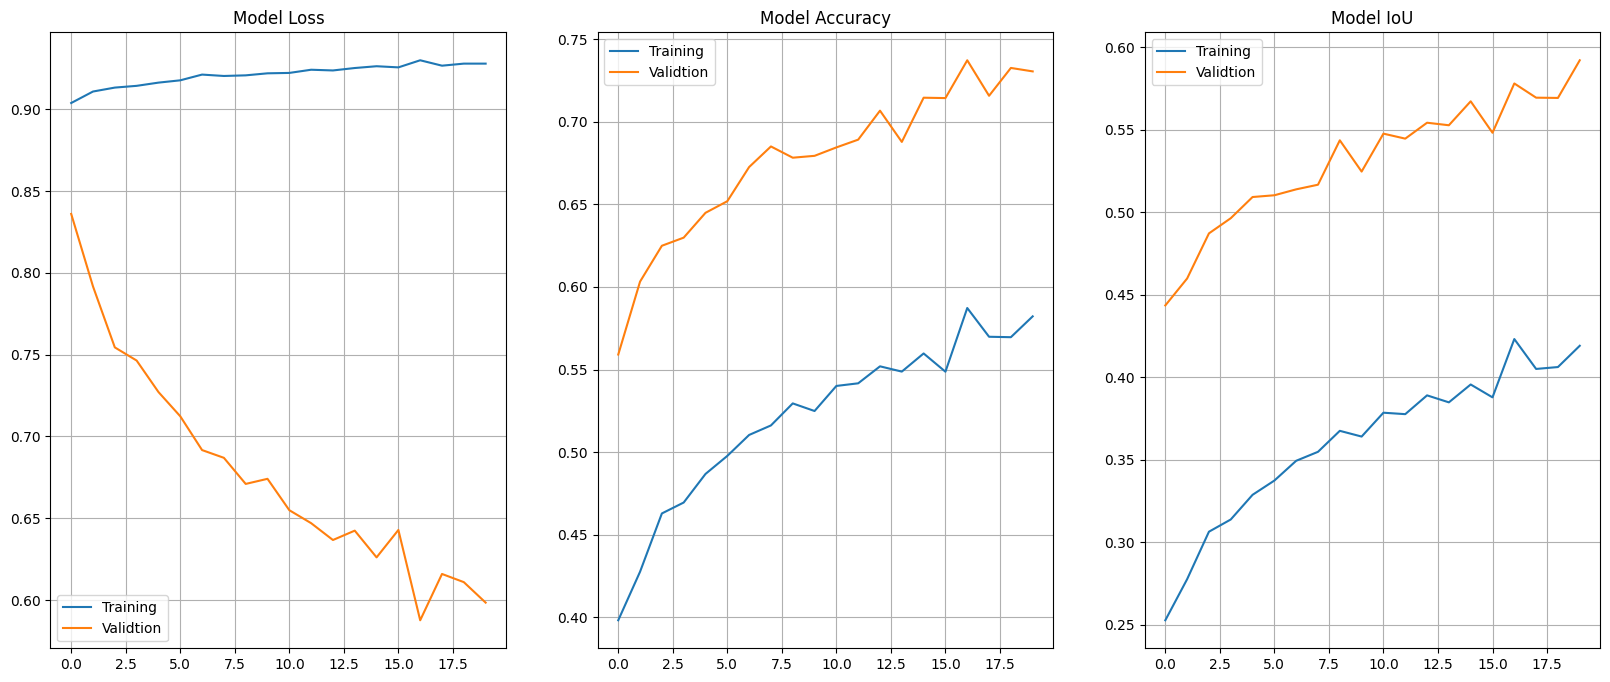

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title("Model Loss")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.title("Model Accuracy")
plt.plot(accuracy, label="Training")
plt.plot(val_accuracy, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.title("Model IoU")
plt.plot(iou, label="Training")
plt.plot(val_iou, label="Validtion")
plt.legend()
plt.grid()

plt.show()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def load_unseen_image(image_path, img_size=(128, 128)):
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

def predict_and_visualize(model, image_path):
    image, original_image = load_unseen_image(image_path)

    # Make prediction
    prediction = model.predict(image)[0]

    # Create overlay image
    overlay = np.array(original_image) / 255.0
    mask = np.expand_dims(prediction[:, :, 0], axis=-1)
    overlay[:, :, :3] = overlay[:, :, :3] * 0.7 + mask * [1, 0, 0] * 0.3

    # Display images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Predicted Mask")
    plt.imshow(prediction[:, :, 0], cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Overlay Image")
    plt.imshow(overlay)
    plt.axis("off")

    plt.show()

# Load model (try with compile=False first)
model = tf.keras.models.load_model("C:/Users/jeeva/OneDrive/Desktop/new_data/models/segmentation5_keras.keras", compile=False)

# If model requires compiling, do it manually
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Test with unseen image
predict_and_visualize(model, r"C:\Users\jeeva\OneDrive\Desktop\new_data\train_test_validation\test\Malignant\Images\malignant (212).png")


TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': None}.

Exception encountered: Could not locate class 'EncoderBlock'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'EncoderBlock', 'config': {'name': 'Encoder_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'rate': 0.1, 'pooling': True}, 'registered_name': 'EncoderBlock', 'build_config': {'input_shape': [None, 256, 256, 3]}, 'name': 'Encoder_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 256, 256, 3], 'dtype': 'float32', 'keras_history': ['input_layer', 0, 0]}}], 'kwargs': {}}]}

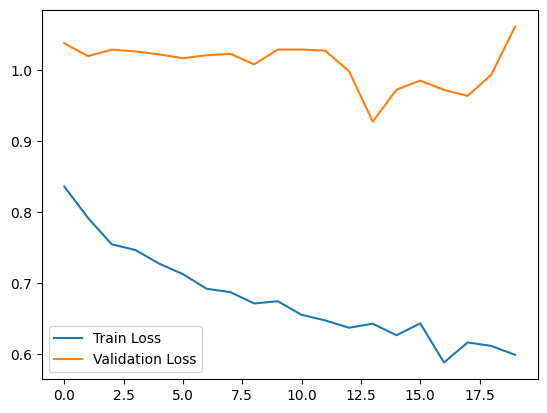

In [34]:
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


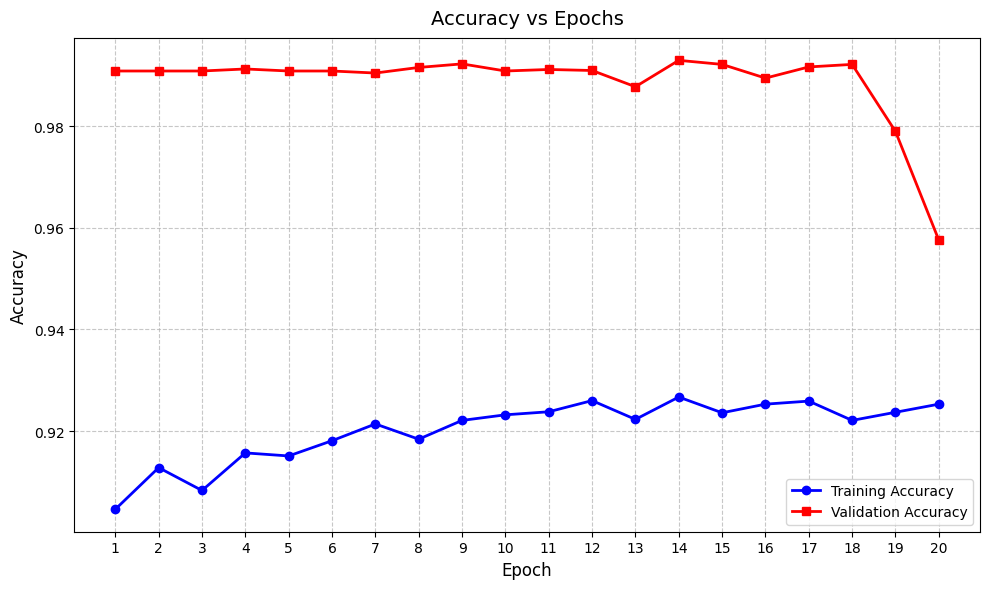

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the training log
epochs = np.arange(1, 21)
train_accuracy = [0.9046, 0.9128, 0.9083, 0.9157, 0.9151, 0.9181, 0.9214, 0.9184, 0.9221, 0.9232, 
                  0.9238, 0.9260, 0.9223, 0.9267, 0.9236, 0.9253, 0.9259, 0.9221, 0.9237, 0.9253]
val_accuracy = [0.9909, 0.9909, 0.9909, 0.9913, 0.9909, 0.9909, 0.9905, 0.9916, 0.9923, 0.9909, 
                0.9912, 0.9910, 0.9878, 0.9930, 0.9922, 0.9895, 0.9917, 0.9922, 0.9790, 0.9576]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy', linewidth=2, marker='o')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy', linewidth=2, marker='s')
plt.title('Accuracy vs Epochs', fontsize=14, pad=10)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(epochs)
plt.tight_layout()

# Save the plot
plt.savefig('accuracy_vs_epochs.png')